In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from a2c.a2c import A2C
from environments.continuous_teaching import ContinuousTeaching

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback

from environments.continuous_teaching import ContinuousTeaching
from environments.discontinuous_teaching import DiscontinuousTeaching
from human_agents import generate_agents
from visualization_utils.episode_runs import run_one_episode


from baseline_policies.conservative import Conservative 
from baseline_policies.leitner import Leitner 
from baseline_policies.threshold import Threshold 

In [2]:
exp1=A2C.load('runs/discont_exp/run_1')
# exp15=A2C.load('runs/discont_exp/run_1.5')
# exp2=A2C.load('runs/discont_exp/run_2')
# exp3=A2C.load('runs/discont_exp/run_3')
# exp4=A2C.load('runs/discont_exp/run_4')
pen1 = A2C.load('runs/eb_pen/eb_run_1')
pen2 = A2C.load('runs/eb_pen/eb_run_2')
pen15 = A2C.load('runs/eb_pen/eb_run_0.5')
pen3 = A2C.load('runs/eb_pen/eb_run_3')
pen4 = A2C.load('runs/eb_pen/eb_run_4')
pen20 = A2C.load('runs/eb_pen/eb_run_20')
monotonic1 = A2C.load('runs/eb_pen/monotonic_run_1')
monotonic2 = A2C.load('runs/eb_pen/monotonic_run_2')
monotonic3 = A2C.load('runs/eb_pen/monotonic_run_3')
# monotonic4 = A2C.load('runs/eb_pen/monotonic_run_4')
# monotonic5= A2C.load('runs/eb_pen/monotonic_run_0.5')
# monotonic4=A2C.load('runs/aug_20/monotonic_4')
# monotonic8=A2C.load('runs/aug_20/monotonic_8')
# monotonic12=A2C.load('runs/aug_20/monotonic_12')
# monotonic20=A2C.load('runs/aug_20/monotonic_20')
av1 = A2C.load('runs/aug_20/avoid_forget_1')
av2 = A2C.load('runs/aug_20/avoid_forget_2')
av5 = A2C.load('runs/aug_20/avoid_forget_5')
av10 = A2C.load('runs/aug_20/avoid_forget_10')
av20 = A2C.load('runs/aug_20/avoid_forget_20')
# ml = A2C.load('runs/discontinuous_runs/run_mean_learned')

In [3]:
model=av1
env1=model.env
env1.t_max = 600
exp1.env.obs.shape
model.env.gamma

1

In [4]:
env = DiscontinuousTeaching(
    tau=0.9,
    break_length=24 * 60 ** 2,
    time_per_iter=3,
    n_iter_per_session=100,
    initial_forget_rates=model.env.all_forget_rates,
    initial_repetition_rates=model.env.all_repetition_rates,
    delta_coeffs=np.array([3, 20]),
    n_item=model.env.n_item,
    penalty_coeff=0.0,
    reward_type=4,
)

In [5]:
rewards, actions=run_one_episode(env, model, 0)

a2c | final reward 84 | precision 2.92


In [16]:
# monotonic case
b = [0]
for x in rewards:
    b += [b[-1] + x]

In [103]:
# exponential case
rewards = np.log10(np.array(rewards)) * env1.n_item

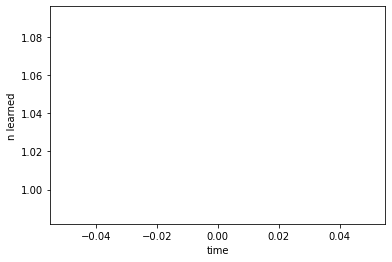

In [18]:
n_learned = np.array(rewards)#/20*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

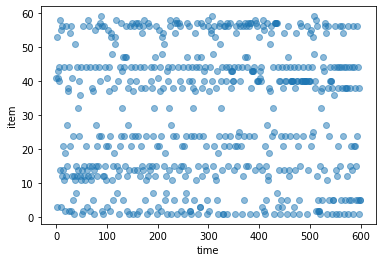

In [52]:
fig, ax = plt.subplots()
ax.scatter(np.arange(env1.t_max), actions, alpha=0.5)
ax.set_xlabel("time")
ax.set_ylabel("item");

In [48]:
env1.obs[0]

array([0.        , 0.        , 0.17122265])

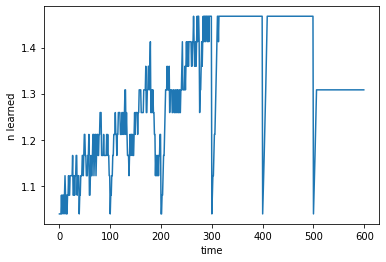

In [130]:
n_learned = np.array(rewards2)#*env1.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

In [10]:
model=exp1

In [34]:
# ms = [monotonic5, monotonic1, monotonic2, monotonic3, monotonic4]
ms = [monotonic2, monotonic4, monotonic8, monotonic12, monotonic20]
ms = [av1, av2, av5, av10, av20]
# labels = [0.5, 1, 2, 3, 4]
labels = [2, 4, 8, 12, 20]
markers_on = [i * 100 for i in range(1, 7)]
markers=['D', '*', 's', 'X', 'p']

a2c | final reward 67 | precision 1.37
a2c | final reward 69 | precision 1.63
a2c | final reward 81 | precision 1.81
a2c | final reward 72 | precision 1.65
a2c | final reward 72 | precision 1.65
a2c | final reward 67 | precision 1.43
a2c | final reward 69 | precision 1.43
a2c | final reward 81 | precision 1.66
a2c | final reward 72 | precision 1.55
a2c | final reward 75 | precision 1.54
a2c | final reward 95 | precision 1.98
a2c | final reward 98 | precision 2.30
a2c | final reward 102 | precision 2.28
a2c | final reward 115 | precision 2.56
a2c | final reward 119 | precision 2.66
a2c | final reward 78 | precision 1.71
a2c | final reward 81 | precision 1.81
a2c | final reward 88 | precision 1.73
a2c | final reward 88 | precision 1.96
a2c | final reward 88 | precision 1.91
a2c | final reward 69 | precision 1.40
a2c | final reward 64 | precision 1.35
a2c | final reward 67 | precision 1.37
a2c | final reward 64 | precision 1.51
a2c | final reward 69 | precision 1.75


Text(0.5, 0.98, 'Forget: 0.005898177679697213, \n Repetition: 0.38673813712755295')

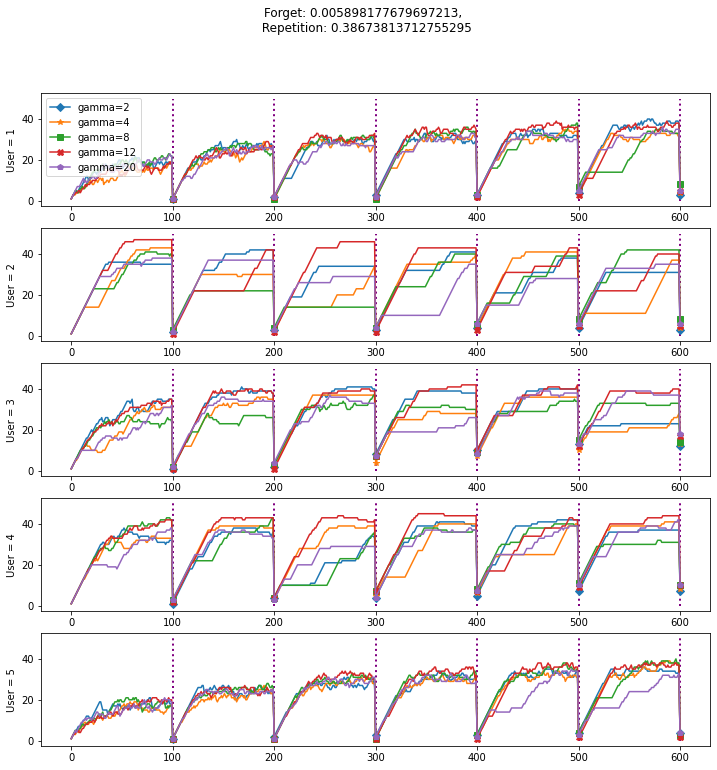

In [35]:
fig, axs = plt.subplots(5, figsize=(12, 12))
for i in range(5):
    for j in range(len(ms)):
        r1, a1 = run_one_episode(env, ms[j], i)
        r1 = np.log10(np.array(r1)) * env.n_item
        axs[i].plot(r1, label='gamma={}'.format(labels[j]), markevery=markers_on, marker=markers[j])
#         print('a2c', np.sum(nl1))
    axs[i].vlines(x=markers_on, colors='purple', ls=':', lw=2, ymin=0, ymax=50)
    axs[i].set_ylabel('User = {}'.format(i+1))

        
axs[0].legend()

fig.suptitle('Forget: {}, \n Repetition: {}'.format(env1.all_forget_rates.mean(), env1.all_repetition_rates.mean()))
# axs[0, 0].set_title('A2C')
# axs[0, 1].set_title('Conservative')

In [18]:
env1=env

In [19]:
cons = Conservative(env=env1)
leit = Leitner(env=env1)
thresh = Threshold(env=env1)
ms = [cons, model]
labels = [x.__class__.__name__.lower() for x in ms]
markers_on = [i * 100 for i in range(1, 7)]
markers=['X', '*', 's', 'D', 'p']

# rewards2, actions2 = run_one_episode(env1, policy, is_a2c=False)

conservative | final reward 88 | precision 8.81
9.638935108153078 conservative
a2c | final reward 84 | precision 2.83
21.600665557404326 a2c
conservative | final reward 88 | precision 8.01
10.574043261231282 conservative
a2c | final reward 78 | precision 3.02
20.15973377703827 a2c
conservative | final reward 257 | precision 6.79
32.84359400998336 conservative
a2c | final reward 88 | precision 3.04
21.73377703826955 a2c
conservative | final reward 119 | precision 6.30
17.89683860232945 conservative
a2c | final reward 81 | precision 2.72
21.948419301164726 a2c
conservative | final reward 84 | precision 9.42
8.707154742096506 conservative
a2c | final reward 78 | precision 2.62
21.04658901830283 a2c


Text(0.5, 0.98, 'Forget: 0.005898177679697213, \n Repetition: 0.38673813712755295')

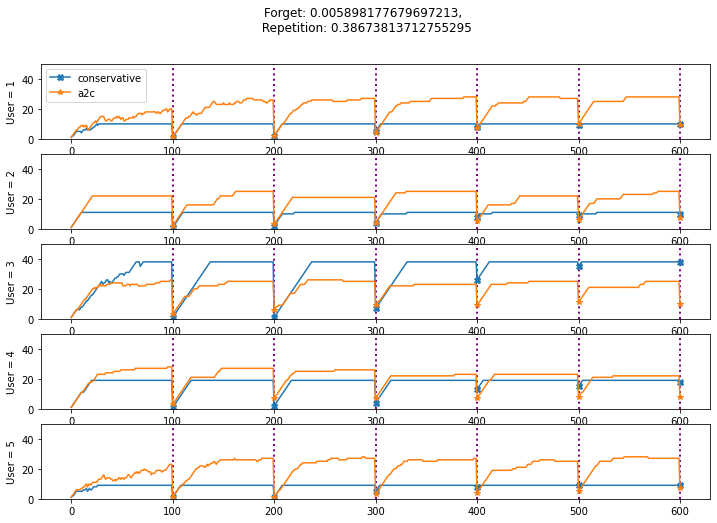

In [20]:
## A2C and Conservative
fig, axs = plt.subplots(5, figsize=(12, 8))
for i in range(5):
    for j in range(len(ms)):
        r2, a2 = run_one_episode(env1, ms[j], i, sim_exam=True)
        nl2 = np.array(r2)#*env.n_item
        nl2 = np.log10(nl2) * env1.n_item
        axs[i].plot(nl2, marker=markers[j], label=labels[j], markevery=markers_on)
        print(np.mean(nl2), labels[j])
    axs[i].vlines(x=markers_on, colors='purple', ls=':', lw=2, ymin=0, ymax=50)

    axs[i].set_ylim(0,50)
    axs[i].set_ylabel('User = {}'.format(i+1))
        

    
axs[0].legend()

fig.suptitle('Forget: {}, \n Repetition: {}'.format(env1.all_forget_rates.mean(), env1.all_repetition_rates.mean()))
# axs[0, 0].set_title('A2C')
# axs[0, 1].set_title('Conservative')

100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1539.69it/s]


a2c | final reward -1860 | precision -36.47
a2c 7


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 66.66it/s]


conservative | final reward -60 | precision -5.45
cons 10


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1316.09it/s]


a2c | final reward -1860 | precision -36.47
a2c 7


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 67.50it/s]


conservative | final reward -60 | precision -5.45
cons 10


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1422.52it/s]


a2c | final reward -1740 | precision -36.25
a2c 11


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 68.83it/s]


conservative | final reward 0 | precision 0.00
cons 38


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1400.22it/s]


a2c | final reward -2280 | precision -44.71
a2c 9


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 69.52it/s]


conservative | final reward -60 | precision -3.16
cons 18


100%|██████████████████████████████████████▉| 599/600 [00:00<00:00, 1353.68it/s]


a2c | final reward -2100 | precision -42.86
a2c 3


100%|████████████████████████████████████████▉| 599/600 [00:08<00:00, 69.60it/s]


conservative | final reward 0 | precision 0.00
cons 9


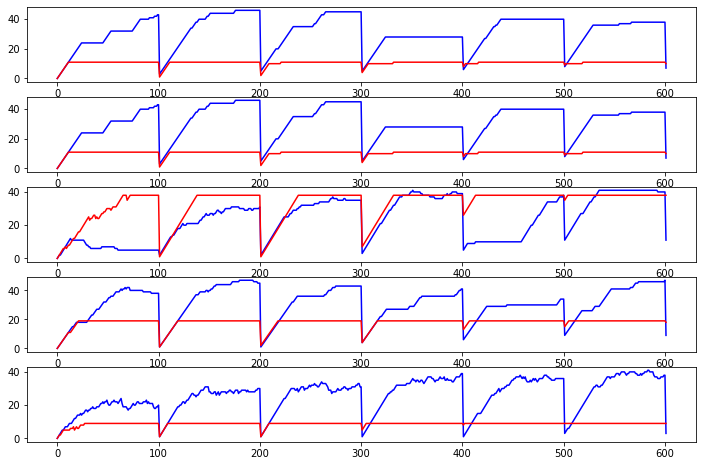

In [30]:
# monotonic case

fig, axs = plt.subplots(5, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode(env, model, i)
    nl1 = np.array(r1)#*env.n_item
#     nlp1 = nl1[nl1>0]
    b = [0]
    for x in nl1:
        b += [b[-1] + x]
    print('a2c', b[-1])
    axs[i].plot(b, color='b', label='A2C')
    r2, a2 = run_one_episode(env, policy, i)
    nl2 = np.array(r2)#*env.n_item
#     nlp2 = nl2[nl2>0]
    b = [0]
    for x in nl2:
        b += [b[-1] + x]
    print('cons', b[-1])
    axs[i].plot(b, color='r', label='Conservative')
# axs[0, 0].set_title('A2C')
# axs[0, 1].set_title('Conservative')

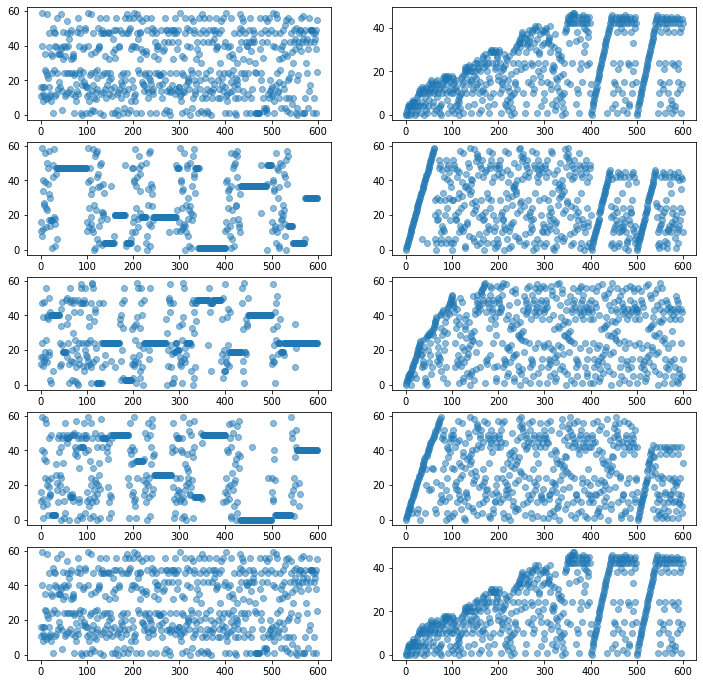

In [249]:
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    axs[i, 0].scatter(np.arange(env1.t_max), a1, alpha=0.5)
    r2, a2 = run_one_episode(env1, policy, i, is_a2c=False)
    axs[i, 1].scatter(np.arange(env1.t_max), a2, alpha=0.5)